#### Обработка данных

In [2]:
import pandas as pd
import numpy as np
import math as m

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('data/experiment.csv') # Считываем данные

In [4]:
data.head(5)

,I,V
0,0.005,29.42
1,0.005,51.19
2,2.772,85.58
3,3.854,91.29
4,5.479,99.47


In [5]:
data.insert(2, 'V - IR', data['V'] - 5100*data['I']*0.001)

In [6]:
data.head(5)

,I,V,V - IR
0,0.005,29.42,29.3945
1,0.005,51.19,51.1645
2,2.772,85.58,71.4428
3,3.854,91.29,71.6346
4,5.479,99.47,71.5271


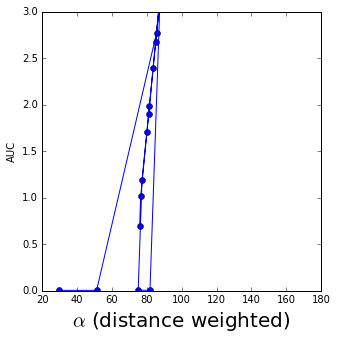

In [7]:
plt.figure(1, figsize=(5,5))
plt.plot(data['V'], data['I'], marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
plt.ylim((0, 3))
plt.show()

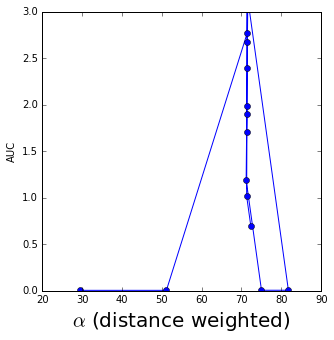

In [8]:
plt.figure(1, figsize=(5,5))
plt.plot(data['V - IR'], data['I'], marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
plt.ylim((0, 3))
plt.show()

In [9]:
U = [117.9, 100.93, 135.5, 95.6]

In [10]:
U = np.array(U) - (76.49 - 5.1*1.02)

In [11]:
U = U * (1/(0.7*0.001))

In [12]:
Rth = U

In [13]:
Rexp = np.array([1.9, 0.8, 2.4, 0.5])*100000

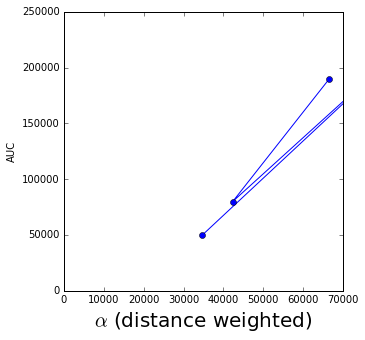

In [14]:
plt.figure(1, figsize=(5,5))
plt.plot(Rth, Rexp, marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
xlim((0, 70000))
ylim((0, 250000))


plt.show()

In [15]:
Rth

array([ 66588.57142857,  42345.71428571,  91731.42857143,  34731.42857143])

In [16]:
Rexp

array([ 190000.,   80000.,  240000.,   50000.])

In [46]:
C = np.array([5, 4, 3, 2])
T1 = np.reciprocal(np.array([57.7, 71.7, (100.6 + 98.7)/2, (167.0 + 179.0)/2]))

In [47]:
C

array([5, 4, 3, 2])

In [48]:
(9*10**(5))*C*(10**(-8))*0.23

array([ 0.01035,  0.00828,  0.00621,  0.00414])

In [49]:
T1

array([ 0.01733102,  0.013947  ,  0.01003512,  0.00578035])

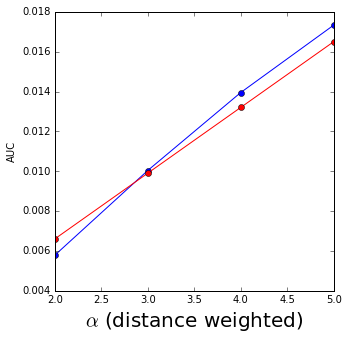

In [73]:
plt.figure(1, figsize=(5,5))
plt.plot(C, T1, marker='o', color='b')
plt.plot(C, (3*10**(5))*C*(10**(-8))*1.1, marker='o', color='r')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
plt.show()

In [70]:
Re = np.array([9, 7, 5, 4, 3, 2])
T2e = np.reciprocal(np.array([19.9, 25.9, 35.9, 44.9, 59.9, 87.9]))
Rt = np.array([0.0, 10])
T2t = np.array([0.0, 15*1000*5*10**(-6)*m.log((106.2 - 76.49)/(106.2 - 85.6))])

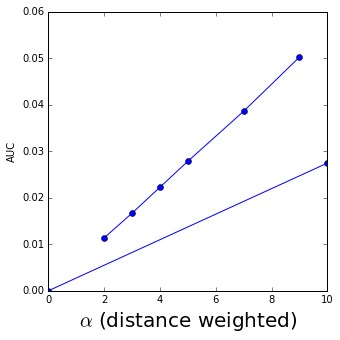

In [71]:
plt.figure(1, figsize=(5,5))
plt.plot(Re, T2e, marker='o', color='b')
plt.plot(Rt, T2t, marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
xlim((0, 10))
ylim((0, 0.06))
plt.show()

In [63]:
T2t

array([ 0.        ,  0.01830963])

In [64]:
T2e

array([ 0.05025126,  0.03861004,  0.02785515,  0.02227171,  0.01669449,
        0.01137656])

In [81]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, Re, T2e, method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.0001322) + (0.0055422)*x
(+-)(0.0002063) + (+-)(0.0000373)*x


In [73]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, C, T1, method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (-0.0017240) + (0.0038564)*x
(+-)(0.0005081) + (+-)(0.0001383)*x


In [74]:
T1

array([ 0.01733102,  0.013947  ,  0.01003512,  0.00578035])

In [75]:
C

array([5, 4, 3, 2])

In [77]:
Re*0.0055

array([ 0.0495,  0.0385,  0.0275,  0.022 ,  0.0165,  0.011 ])

In [78]:
T2e

array([ 0.05025126,  0.03861004,  0.02785515,  0.02227171,  0.01669449,
        0.01137656])

In [79]:
Re

array([9, 7, 5, 4, 3, 2])

In [82]:
C

array([5, 4, 3, 2])

In [83]:
T1

array([ 0.01733102,  0.013947  ,  0.01003512,  0.00578035])

In [84]:
0.0038564*C

array([ 0.019282 ,  0.0154256,  0.0115692,  0.0077128])

Выполнение

In [33]:
data['errI'] = 0.005
data['errV'] = 0.05
data['errVIR'] = 0.05

In [34]:
data

,I,V,V - IR,errI,errV,errVIR
0,0.005,29.42,29.3945,0.005,0.05,0.05
1,0.005,51.19,51.1645,0.005,0.05,0.05
2,2.772,85.58,71.4428,0.005,0.05,0.05
3,3.854,91.29,71.6346,0.005,0.05,0.05
4,5.479,99.47,71.5271,0.005,0.05,0.05
5,9.800,122.13,72.1500,0.005,0.05,0.05
6,12.910,139.04,73.1990,0.005,0.05,0.05
7,15.400,152.97,74.4300,0.005,0.05,0.05
8,19.180,171.83,74.0120,0.005,0.05,0.05
9,16.890,160.07,73.9310,0.005,0.05,0.05


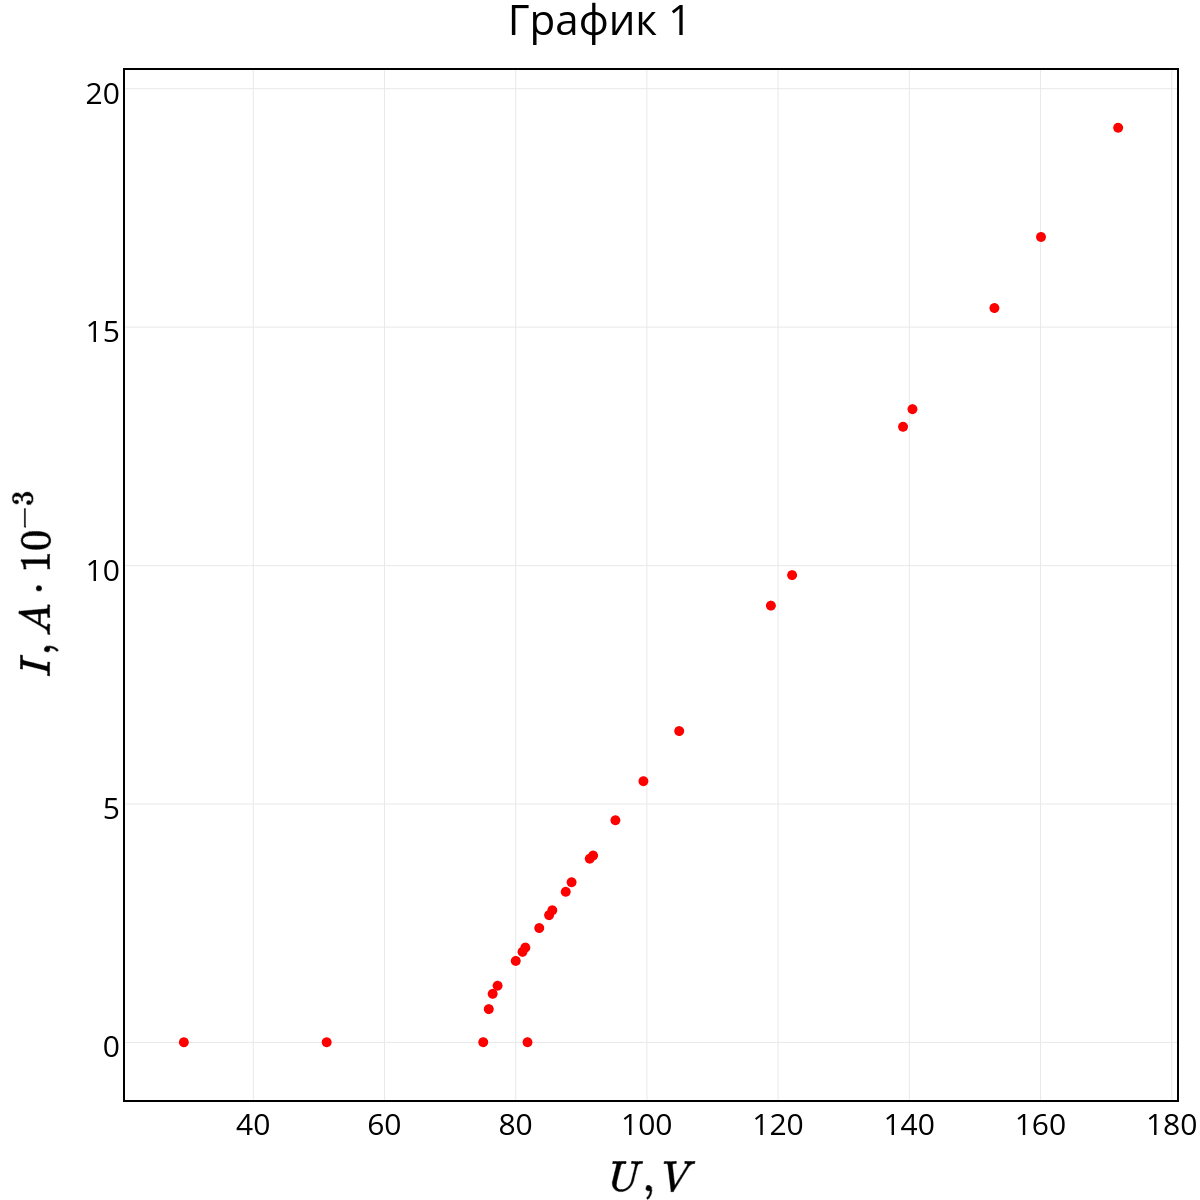

In [120]:
trace1 = go.Scatter(
    y = data['I'],
    x = data['V'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data['errI'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = data['errV'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    title = "График 1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$U, V$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, A \cdot 10^{-3}$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

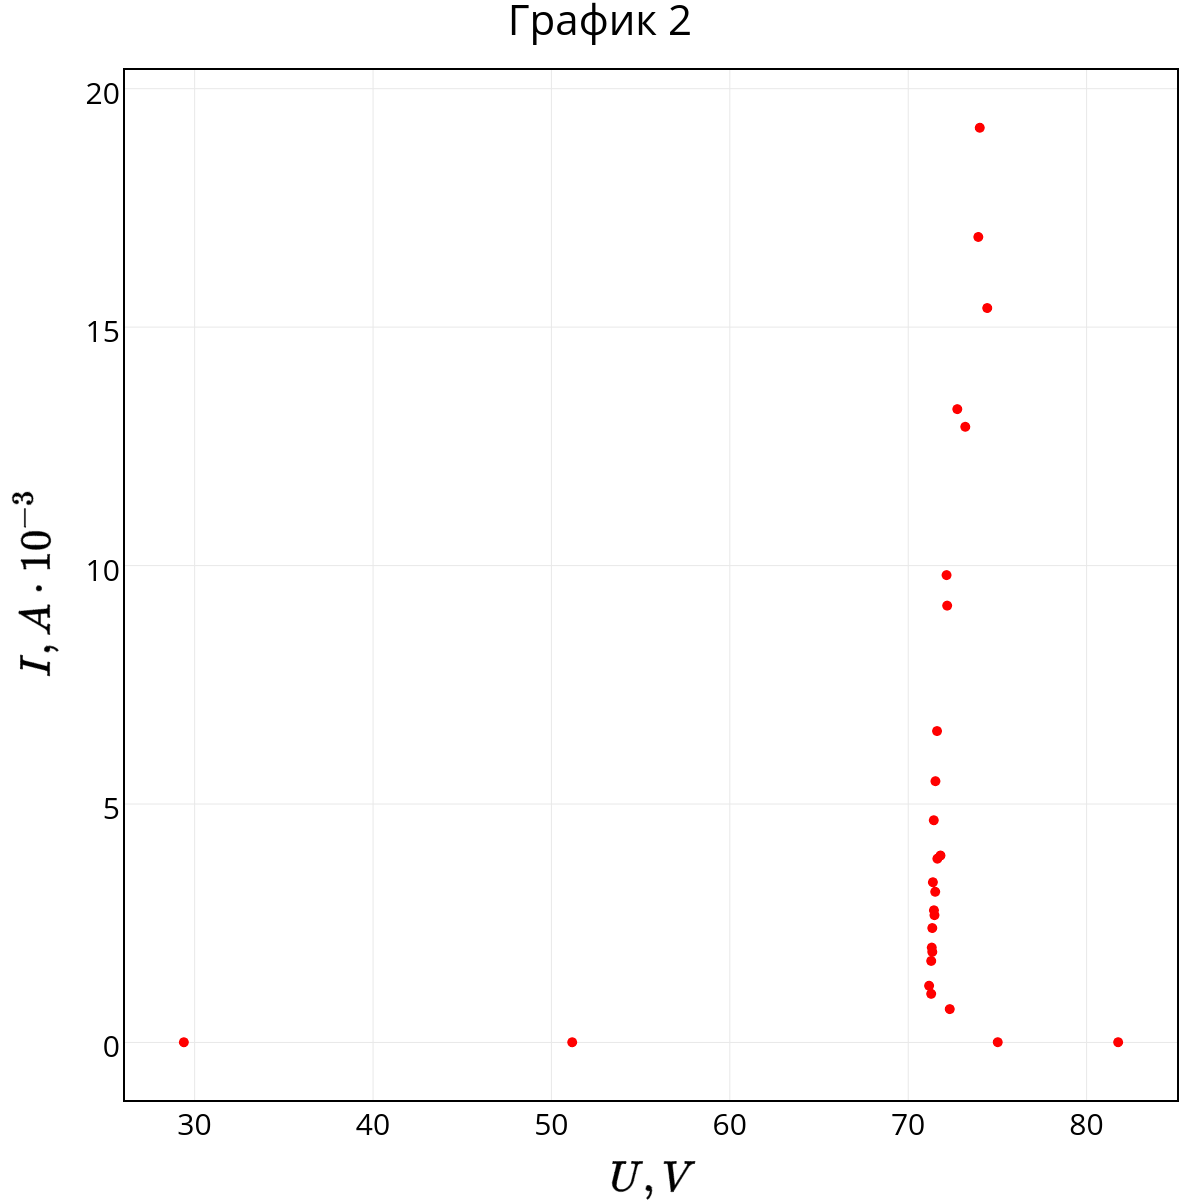

In [39]:
trace1 = go.Scatter(
    y = data['I'],
    x = data['V - IR'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = data['errI'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = data['errVIR'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    title = "График 2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$U, V$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, A \cdot 10^{-3}$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [52]:
C = np.array([5, 4, 3, 2])
T1 = np.reciprocal(np.array([57.7, 71.7, (100.6 + 98.7)/2, (167.0 + 179.0)/2]))

In [74]:
Re = np.array([9, 7, 5, 4, 3, 2])
T2e = np.reciprocal(np.array([19.9, 25.9, 35.9, 44.9, 59.9, 87.9]))

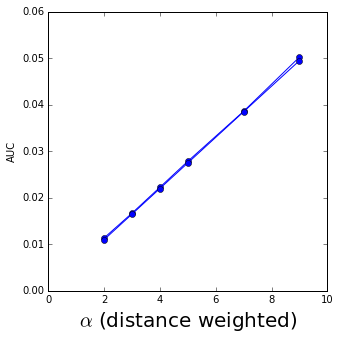

In [70]:
plt.figure(1, figsize=(5,5))
plt.plot(Re, T2e, marker='o', color='b')
plt.plot(Re, Re*(0.05*10**(-1))*1.100, marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
xlim((0, 10))
ylim((0, 0.06))
plt.show()

In [64]:
Re*(0.05*10**(-3))*0.38

array([  1.71000000e-04,   1.33000000e-04,   9.50000000e-05,
         7.60000000e-05,   5.70000000e-05,   3.80000000e-05])

In [72]:
data

,I,V,V - IR,errI,errV,errVIR
0,0.005,29.42,29.3945,0.005,0.05,0.05
1,0.005,51.19,51.1645,0.005,0.05,0.05
2,2.772,85.58,71.4428,0.005,0.05,0.05
3,3.854,91.29,71.6346,0.005,0.05,0.05
4,5.479,99.47,71.5271,0.005,0.05,0.05
5,9.800,122.13,72.1500,0.005,0.05,0.05
6,12.910,139.04,73.1990,0.005,0.05,0.05
7,15.400,152.97,74.4300,0.005,0.05,0.05
8,19.180,171.83,74.0120,0.005,0.05,0.05
9,16.890,160.07,73.9310,0.005,0.05,0.05


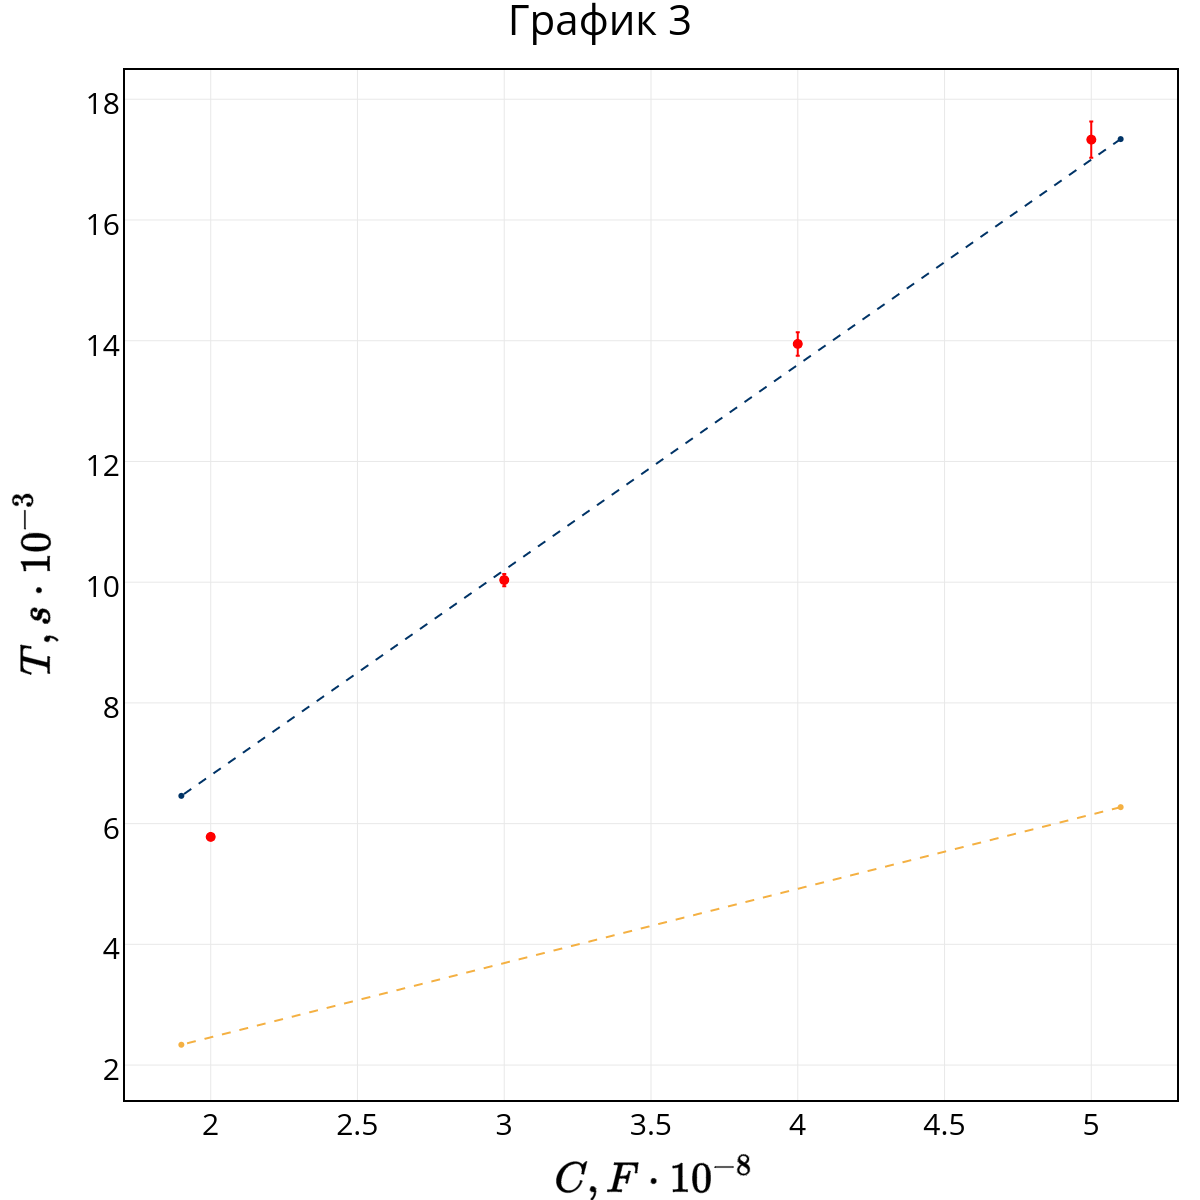

In [122]:
trace1 = go.Scatter(
    y = T1*1000,
    x = C,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = np.ones(4)/(1/T1)*T1*1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)


trace3 = go.Scatter(
    y = [5.1*10**(-8)*3*10**(5)*0.41*1000, 1.9*10**(-8)*3*10**(5)*0.41*1000],
    x = [5.1, 1.9],
    line = dict(
        color = ('#f4b042'),
        width = 2,
        dash = 'dash'),
)

trace2 = go.Scatter(
    y = [5.1*0.0034*1000, 1.9*0.0034*1000],
    x = [5.1, 1.9],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)



trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    showlegend=False,
    title = "График 3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$C, F \cdot 10^{-8}$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$T, s \cdot 10^{-3}$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [79]:
1.9*10**(-8)*9*10**(5)*0.4

0.006839999999999999

In [80]:
T1

array([ 0.01733102,  0.013947  ,  0.01003512,  0.00578035])

In [81]:
C

array([5, 4, 3, 2])

In [104]:
def f(x, b):
    return b*x

parameters_opt, parameters_cov = opt.curve_fit(f, C, numpy.array(T1), method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0]))

IndexError: tuple index out of range

In [105]:
parameters_opt

array([ 0.00340943])

In [102]:
parameters_cov

array([[  7.97568972e-09]])

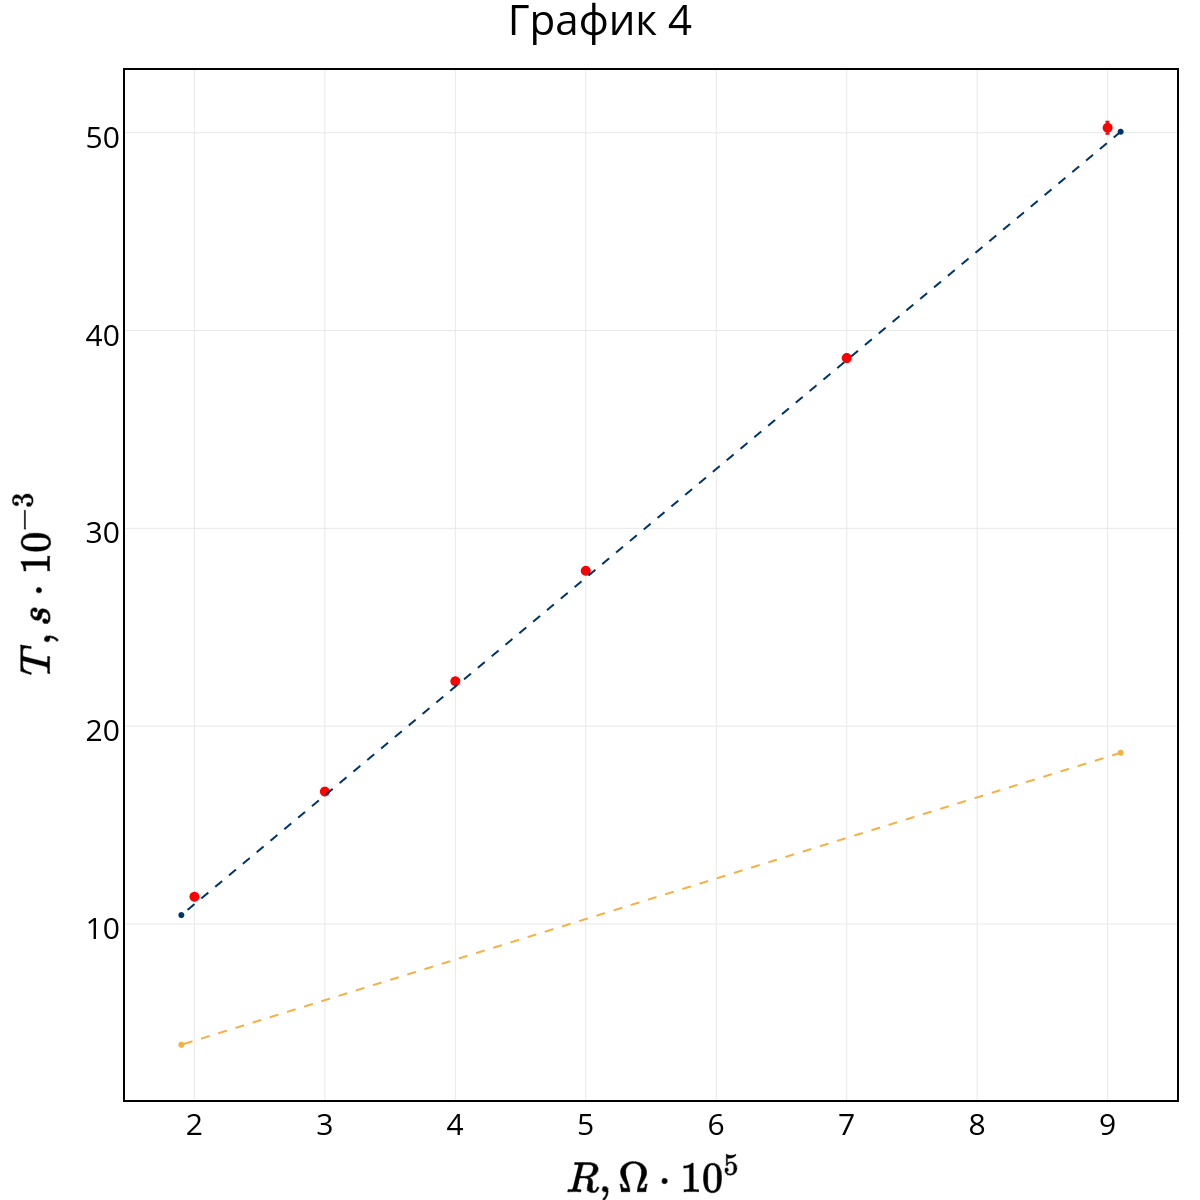

In [123]:
trace1 = go.Scatter(
    y = T2e*1000,
    x = Re,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = np.ones(4)/(1/T1)*T1*1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
)


trace3 = go.Scatter(
    y = [0.41*9.1*10**(5)*5*10**(-8)*1000, 0.41*1.9*10**(5)*5*10**(-8)*1000],
    x = [9.1, 1.9],
    line = dict(
        color = ('#f4b042'),
        width = 2,
        dash = 'dash'),
)

trace2 = go.Scatter(
    y = [9.1*0.0055*1000, 1.9*0.0055*1000],
    x = [9.1, 1.9],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
)



trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    showlegend=False,
    title = "График 4",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$R, \Omega \cdot 10^{5}$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$T, s \cdot 10^{-3}$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 125,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot4.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot4.png", width=500)

In [113]:
def f(x, b):
    return b*x

parameters_opt, parameters_cov = opt.curve_fit(f, Re, numpy.array(T2e), method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0]))

IndexError: tuple index out of range

In [114]:
parameters_cov

array([[  2.26298559e-10]])

In [115]:
parameters_opt

array([ 0.00556375])